# Boston House Price Prediction

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Load Dataset

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\BostonHousing.csv")

# Display first few rows (optional)
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


## 3. Seperate Features and Target

In [6]:
X = data.drop(columns=["medv"])
y = data["medv"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4. Defining Models

In [11]:
models = {
    "Linear Regression": LinearRegression(),

    "Polynomial Regression": Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linear", LinearRegression())
    ]),

    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0))
    ]),

    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01))
    ])
}

## 5. Train, Predict & Evaluate

In [12]:
results = []

predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    predictions[name] = y_pred
    
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    })

## 6. Result & Visualization

In [18]:
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                   Model       MAE        MSE  R2 Score
0      Linear Regression  3.189092  24.291119  0.668759
1  Polynomial Regression  2.574836  14.257338  0.805583
2       Ridge Regression  3.185724  24.312904  0.668462
3       Lasso Regression  3.181247  24.333499  0.668182


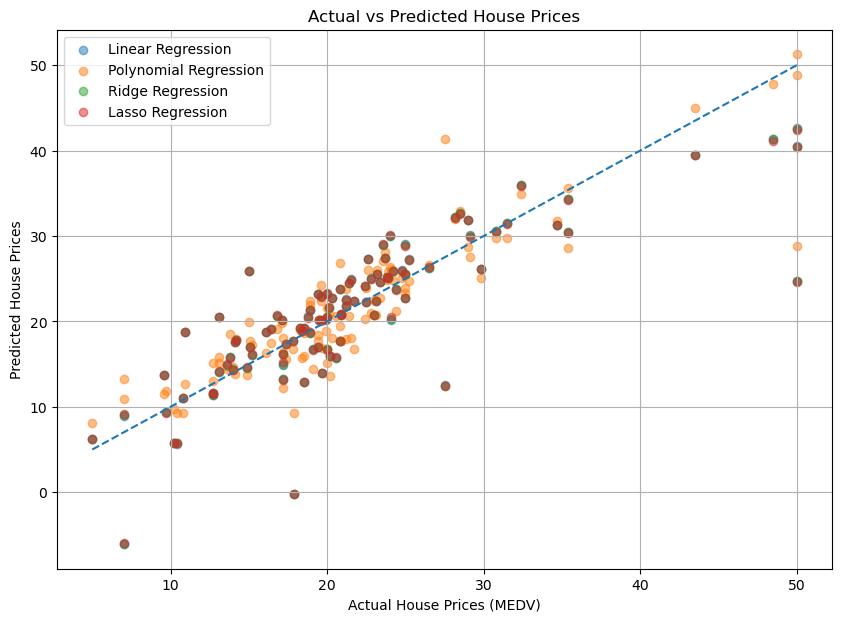

In [19]:
plt.figure(figsize=(10, 7))

for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Actual House Prices (MEDV)")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()